***Must download the following libraries to run the code!***

In [44]:
library(repr)
library(tidyverse)
library(tidymodels)

<h1> Title: </h1>

*Heart Disease Data Project*: Does age and cholesterol level affect heart disease severity?

**Introduction:**

This is a collaborative data science project that specifically focuses on answering a predictive question of our choice on the dataset. Starting from reading and tidying the data, we are required to visualize and classify the variables to answer the question. We decided to use the Heart Disease dataset that was collected from Cleveland hospitals, consisting of observations showing biological information about hospital patients such as their age, sex, cholestral level, exercise level and finally the severity of heart disease diagnosis. Our group decided to use the K-nearest-neighbors classification to predict if higher cholesterol level and age leads to more severe heart disease.

**Preliminary Data Analysis**

Through this analysis, we will demonstrate how the data can be imported and cleaned, summarized into useful information and visualized with distinct colors representing different severity.

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


num,total_diagnosis
<fct>,<int>
No,123
Mild,41
Moderately Severe,25
Severe,26
Very Severe,10


sex,average_age
<dbl>,<dbl>
0,55.64000
1,54.54667


chol
<dbl>
564


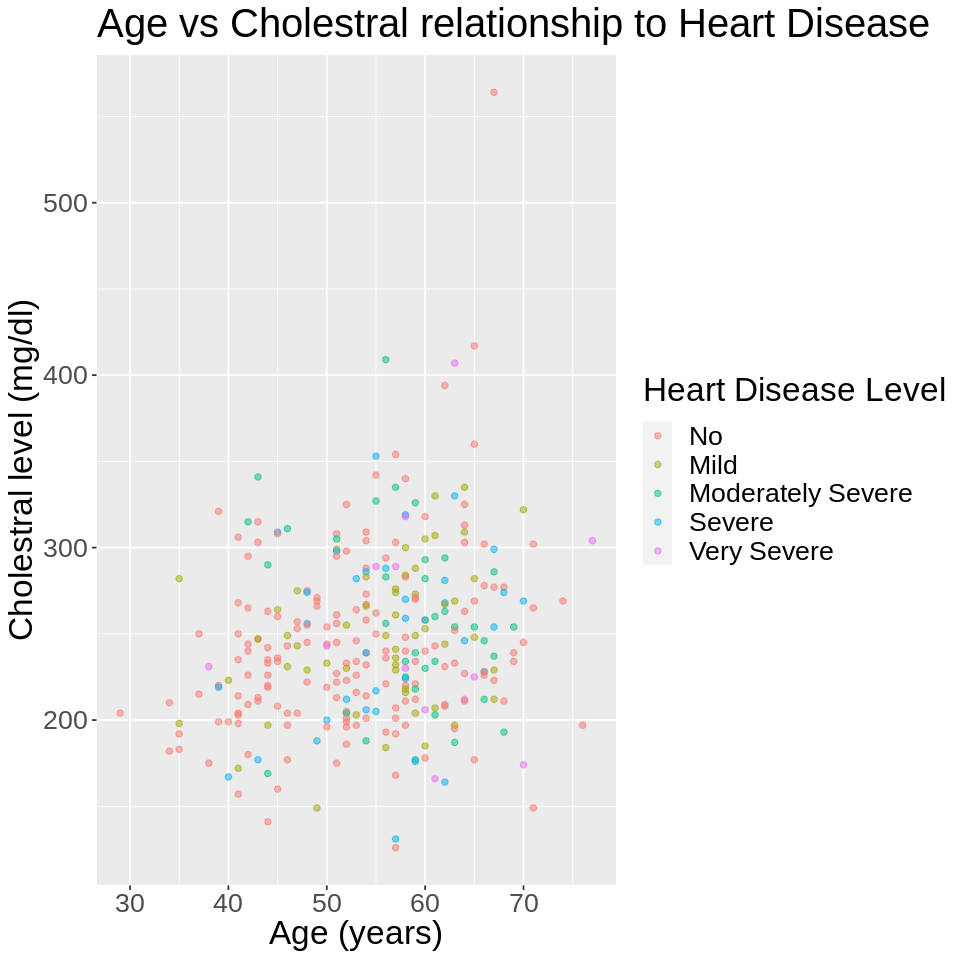

In [42]:
#READING DATA FROM WEB
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
heart_data <- read_csv(url, col_names = FALSE)

#TIDYING DATA

#1 adding column names
colnames(heart_data) <- c("age", "sex", "cp", "rbp", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

# Variables used: 
# - age: Age of each patients
# - num: Heart disease severity
# - chol: Serum cholestral level of each patients
# - sex: gender of each patients

#2 mutating the data to make categorical variables
heart_data_tidy_1 <- heart_data |>
                        select(age, sex, chol, num, thalach) |>
                        mutate(num = as_factor(num)) |>
                        arrange(desc(chol))


#3 reorganizing observations to make it readable
organized_heart_data <- heart_data_tidy_1 |> 
                        mutate(num = recode(num, '0' = 'No')) |>
                        mutate(num = recode(num, '1' = 'Mild')) |>
                        mutate(num = recode(num, '2' = 'Moderately Severe')) |>
                        mutate(num = recode(num, '3' = 'Severe')) |>
                        mutate(num = recode(num, '4' = 'Very Severe')) 

#GROUP/SUMMARIZING DATA

#Example of how we will split data
heart_data_split <- initial_split(organized_heart_data, prop = 0.75, strata = num)
heart_data_train <- training(heart_data_split) #we will use this for summarizing
heart_data_test <- testing(heart_data_split)

#1 How many patients have heart disease depending on age
heart_data_summarize <- heart_data_train |>
                        group_by(num) |>
                        summarize(total_diagnosis = n())
                        
                    
heart_data_summarize
#2 Average age across patients
heart_data_summarize_2 <- heart_data_train |>
                        group_by(sex) |>
                        summarize(average_age = mean(age, na.rm = TRUE))

heart_data_summarize_2

#3 Max cholestral level across patients
heart_data_summarize_3 <- heart_data_train |>
                        select(chol) |>
                        map_df(max, na.rm = TRUE)

heart_data_summarize_3             

#PLOTTING DATA

#Scatterplot of age vs height
options(repr.plot.width = 8, repr.plot.height = 8) 
heart_plot <- ggplot(organized_heart_data, aes(x = age, y = chol, color = num)) +
                geom_point(alpha = 0.5) +
                labs(x = "Age (years)", y = "Cholestral level (mg/dl)", color = "Heart Disease Level") + 
                 ggtitle("Age vs Cholestral relationship to Heart Disease") +
                theme(text = element_text(size=20)) 

heart_plot

By observing the plot above, there seems to be no consistent relationship between the points. However, as you look at zones with higher cholesterol (~ 350mg/dl) and higher age (~ 60 years), points with severe heart disease levels seem to be more populated. This could possibly indicate the relationship between the predictors and heart disease.

***Methods:***

We will select the columns chol, age and num to explore the relationship of the predictors and heart disease severity.

<u> 1. Splitting/Recipe Creation: </u>

We begin the preprocessing by mutating the unknown class variable into categorical variable, splitting the data into training and testing sets and creating a recipe with step() functions to standardize the data.

<u> 2. Cross-Validation: </u>

Moreover, we are using cross-validation with optimal folds to ensure our parameter won’t depend on the inconsistent data.

<u> 3. Workflow Model: </u>

Next, we will create a workflow and use tune_grid() to pass in the cross-validated sample and the grid parameter so that it generates cost-accuracy-balanced K values. Here, we can use collect_metrics() to ensure the effectiveness of our k-value.

<u> 4. Predict: </u>

Lastly, we can predict the class by first inputting a tibble containing high cholesterol and age values and one with low values to compare and conclude which produces higher severity in heart disease. 

<u> 5. Visualizing: </u>

For this classification, we decided to present the relationship between age and serum cholesterol level in a scatterplot. Scatterplot allows us to determine the relationship of 2 numerical quantities and view distances of neighbors clearly.

**Expected outcomes and significance:**

Through our classifier, we expect to find a positive correlation between the age, cholesterol level and heart disease severity. This is because scientifically, human organ performance declines over time and the increasing cholesterol level prevents oxygen delivery. Discovering what factors worsens heart disease through this project alarms audiences about the risk and could also propose new scientific studies ideas, having a positive impact towards the medical field. Some further questions could be whether or not the increase in exercise level directly decreases heart disease risk. There can also be medical-related questions as to how biologically aging affects our body organs to create heart disease.